In [14]:
!pip install trimesh matplotlib




In [15]:
import trimesh
import numpy as np
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt

In [16]:
# ✅ Visualize using matplotlib (Colab-compatible)
def show_mesh_matplotlib(mesh):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    vertices = mesh.vertices
    faces = mesh.faces
    mesh_collection = Poly3DCollection(vertices[faces], alpha=0.7)
    mesh_collection.set_facecolor([0.5, 0.5, 1])
    ax.add_collection3d(mesh_collection)
    scale = vertices.flatten()
    ax.auto_scale_xyz(scale, scale, scale)
    plt.title("3D Mesh Rendered in Colab")
    plt.axis('off')
    plt.show()

In [17]:
# ✅ Simulate a small toy car
def generate_toy_car():
    body = trimesh.creation.box(extents=[2.0, 1.0, 0.5])
    wheel = trimesh.creation.cylinder(radius=0.2, height=0.3)
    wheels = []
    offsets = [(-0.8, -0.4), (-0.8, 0.4), (0.8, -0.4), (0.8, 0.4)]
    for x, y in offsets:
        w = wheel.copy()
        w.apply_translation([x, y, -0.25])
        wheels.append(w)
    car = trimesh.util.concatenate([body] + wheels)
    return car

In [18]:
# ✅ Simulate a plastic chair
def generate_chair():
    seat = trimesh.creation.box(extents=[1.0, 1.0, 0.2])
    seat.apply_translation([0, 0, 1.0])
    leg = trimesh.creation.box(extents=[0.1, 0.1, 1.0])
    legs = []
    positions = [(-0.45, -0.45), (-0.45, 0.45), (0.45, -0.45), (0.45, 0.45)]
    for x, y in positions:
        l = leg.copy()
        l.apply_translation([x, y, 0.5])
        legs.append(l)
    chair = trimesh.util.concatenate([seat] + legs)
    return chair

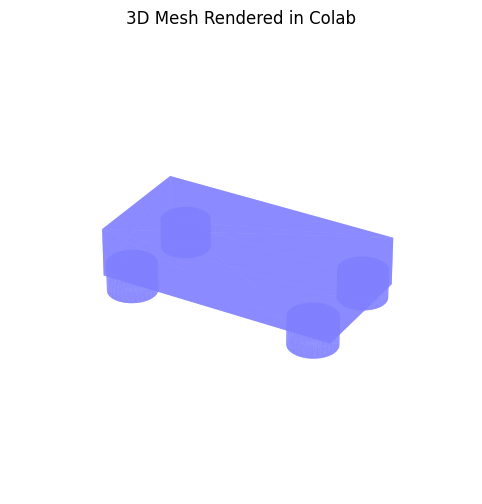

In [19]:
# 🚗 Generate and show toy car
car_mesh = generate_toy_car()
car_mesh.export("toy_car.obj")
show_mesh_matplotlib(car_mesh)

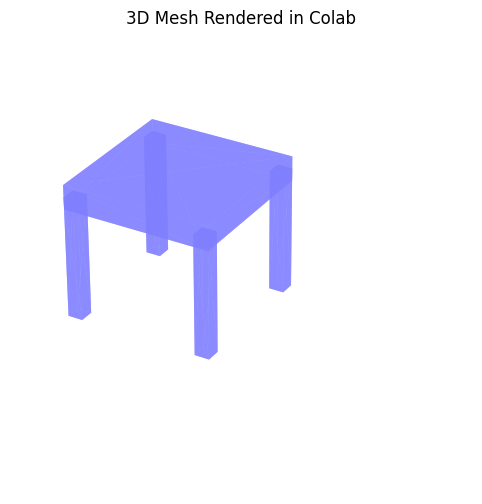

In [20]:
# 🪑 Generate and show plastic chair
chair_mesh = generate_chair()
chair_mesh.export("chair.obj")
show_mesh_matplotlib(chair_mesh)


In [21]:
from google.colab import files
files.download("toy_car.obj")
files.download("chair.obj")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>